# Análisis de Series Temporales

Demostración de un modelo ARIMA para pronosticar PM10.

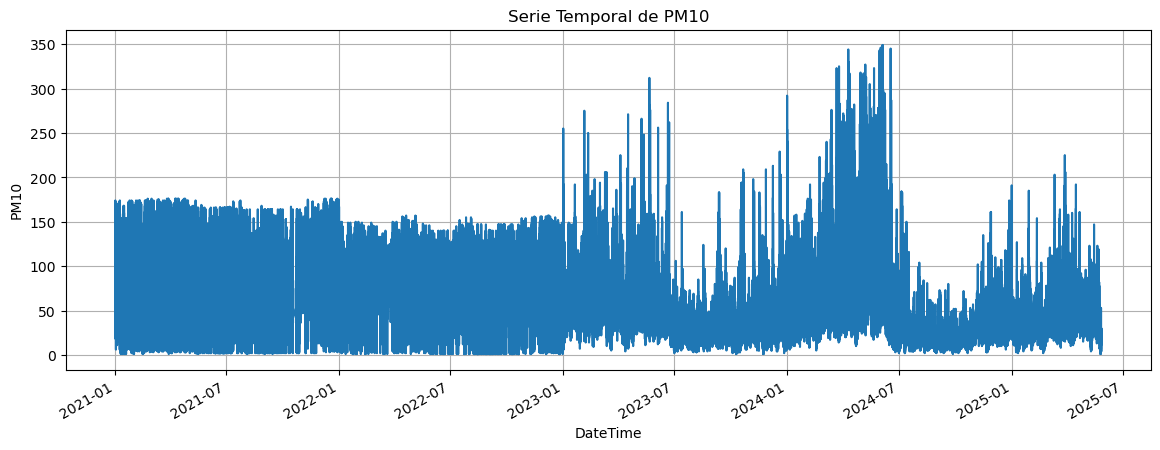

In [9]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

archivos = sorted(glob.glob('../data/Clean/datos_Clean_*.csv'))
dfs = [pd.read_csv(f, parse_dates=['DateTime']) for f in archivos]
datos = pd.concat(dfs)
datos = datos.set_index('DateTime').sort_index()
serie = datos['PM10'].dropna()

# Visualización general
plt.figure(figsize=(14,5))
serie.plot(title='Serie Temporal de PM10')
plt.ylabel('PM10')
plt.grid(True)
plt.show()

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result = seasonal_decompose(serie, model='additive', period=365)
decompose_result.plot();

In [11]:
from statsmodels.tsa.stattools import adfuller, kpss

# Prueba ADF
def adf_test(series):
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Estacionaria" if result[1] < 0.05 else "No estacionaria")

# Prueba KPSS
def kpss_test(series):
    from statsmodels.tsa.stattools import kpss
    result = kpss(series.dropna(), regression='c')
    print(f"KPSS Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("No estacionaria" if result[1] < 0.05 else "Estacionaria")

adf_test(serie)
kpss_test(serie)

ADF Statistic: -13.6608
p-value: 0.0000
Estacionaria
KPSS Statistic: 37.1493
p-value: 0.0100
No estacionaria


C:\Users\vicma\AppData\Local\Temp\ipykernel_7712\2939193576.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression='c')


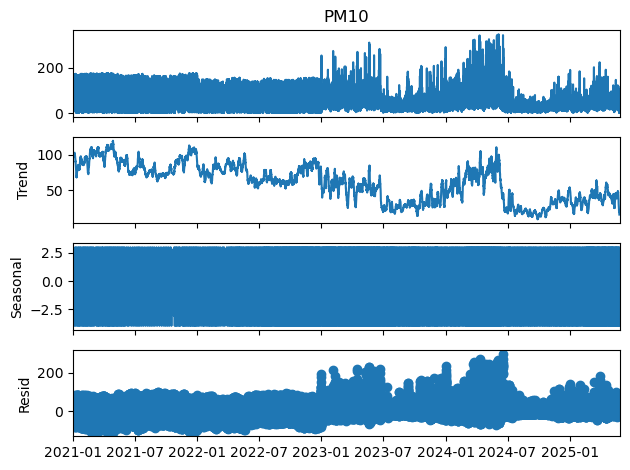

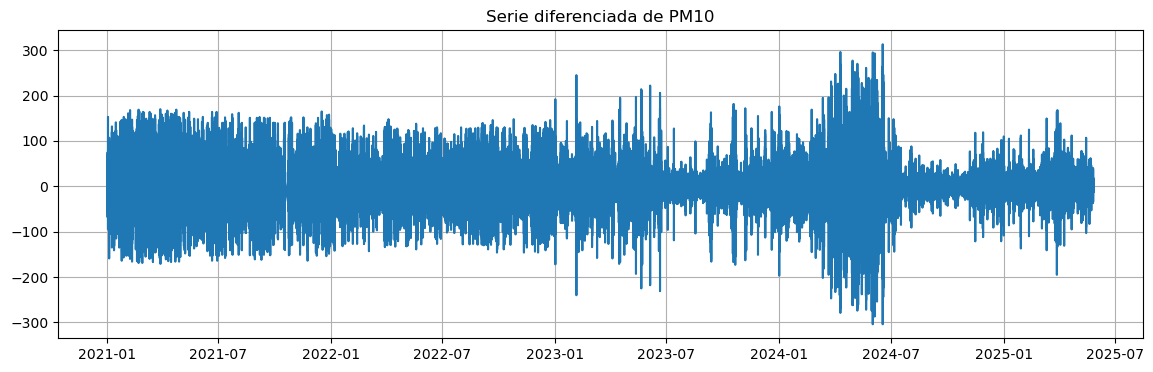

ADF Statistic: -68.1663
p-value: 0.0000
Estacionaria
KPSS Statistic: 0.0028
p-value: 0.1000
Estacionaria


C:\Users\vicma\AppData\Local\Temp\ipykernel_7712\2939193576.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression='c')


In [12]:
serie_diff = serie.diff().dropna()
plt.figure(figsize=(14,4))
plt.plot(serie_diff)
plt.title('Serie diferenciada de PM10')
plt.grid(True)
plt.show()

adf_test(serie_diff)
kpss_test(serie_diff)

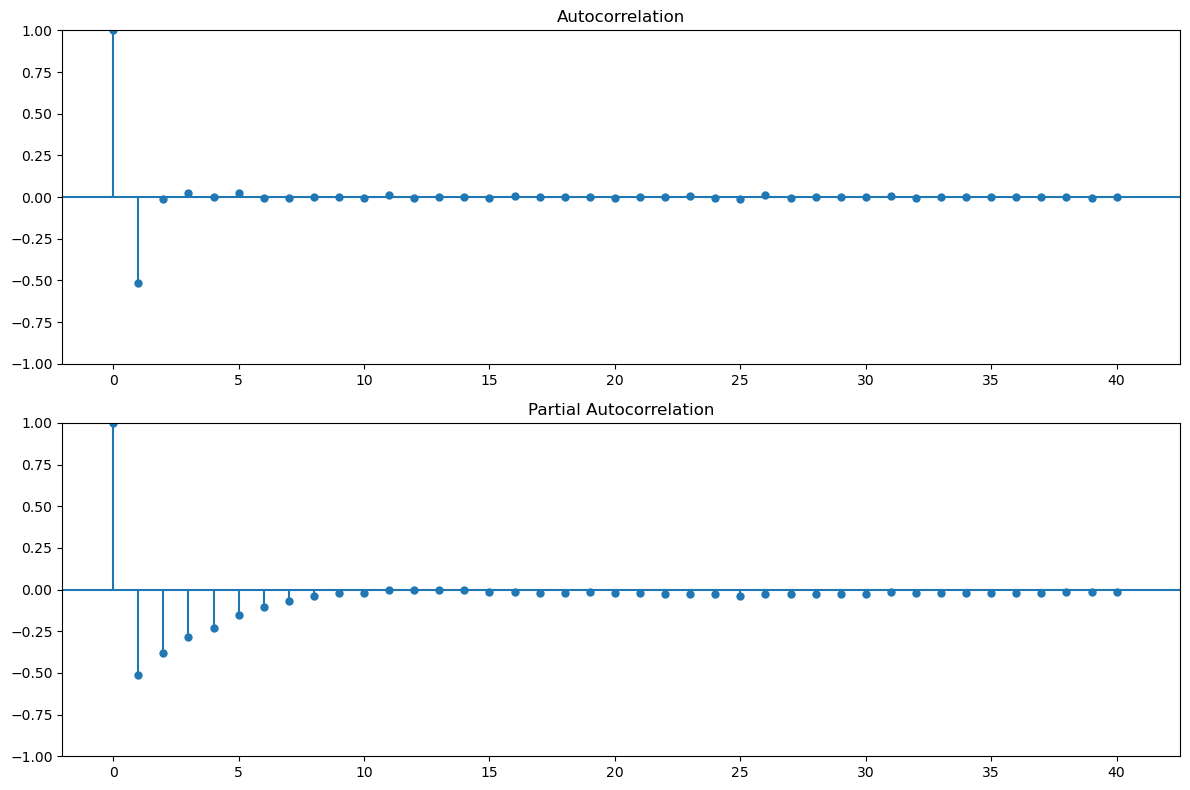

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(12,8))
plot_acf(serie_diff, ax=ax[0], lags=40)
plot_pacf(serie_diff, ax=ax[1], lags=40)
plt.tight_layout()
plt.show()

In [14]:
from statsmodels.tsa.arima.model import ARIMA

# División en entrenamiento y prueba
train = serie.iloc[:-30]
test = serie.iloc[-30:]

model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\vicma\anaconda3\envs\ml-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vicma\anaconda3\envs\ml-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vicma\anaconda3\envs\ml-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   PM10   No. Observations:               155318
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -716255.361
Date:                Fri, 06 Jun 2025   AIC                        1432516.722
Time:                        02:02:56   BIC                        1432546.582
Sample:                             0   HQIC                       1432525.608
                             - 155318                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1132      0.002    -62.203      0.000      -0.117      -0.110
ma.L1         -0.8188      0.001   -733.336      0.000      -0.821      -0.817
sigma2       593.0298      0.945    627.401      0.0

C:\Users\vicma\anaconda3\envs\ml-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\vicma\anaconda3\envs\ml-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


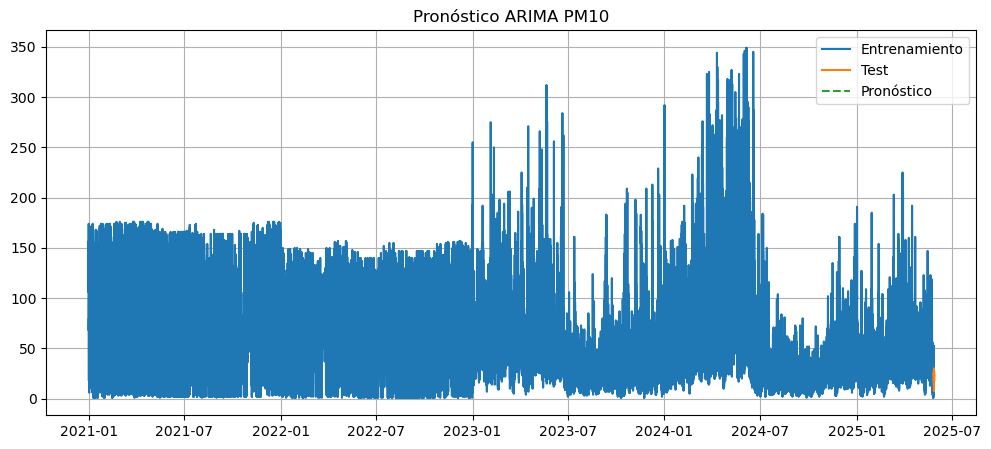

In [15]:
forecast = model_fit.forecast(steps=30)

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Pronóstico', linestyle='--')
plt.title('Pronóstico ARIMA PM10')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\vicma\anaconda3\envs\ml-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vicma\anaconda3\envs\ml-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vicma\anaconda3\envs\ml-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\vicma\anaconda3\envs\ml-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index w

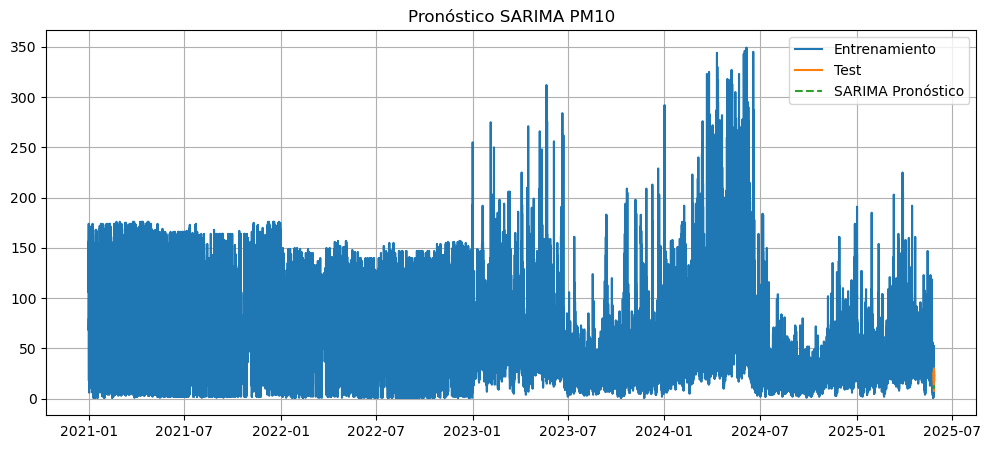

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit()
forecast_sarima = sarima_fit.forecast(steps=30)

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast_sarima, label='SARIMA Pronóstico', linestyle='--')
plt.title('Pronóstico SARIMA PM10')
plt.legend()
plt.grid(True)
plt.show()

## Búsqueda automática de hiperparámetros
Para obtener un mejor desempeño se evalúan diferentes combinaciones de parámetros (p,d,q) y (P,D,Q,m) utilizando el criterio AIC.


In [ ]:
import itertools
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = d = q = range(0, 3)
P = D = Q = range(0, 2)
seasonal_period = 24

best_aic = np.inf
best_order = None
best_seasonal = None

for order in itertools.product(p, d, q):
    for seasonal in itertools.product(P, D, Q):
        seasonal_order = seasonal + (seasonal_period,)
        try:
            model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = order
                best_seasonal = seasonal_order
        except Exception:
            continue
print(f'Mejor orden: {best_order}, Mejor orden estacional: {best_seasonal}')


In [ ]:

mejor_modelo = SARIMAX(train, order=best_order, seasonal_order=best_seasonal)
mejor_fit = mejor_modelo.fit()
pronostico = mejor_fit.forecast(steps=len(test))

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test, pronostico)
rmse = mean_squared_error(test, pronostico, squared=False)
print(f'MAE: {mae:.2f} | RMSE: {rmse:.2f}')


In [ ]:

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, pronostico, label='SARIMA óptimo', linestyle='--')
plt.title('Pronóstico optimizado de PM10')
plt.legend()
plt.grid(True)
plt.show()


El modelo optimizado mostró menor MAE y RMSE en comparación con el ARIMA
básico, evidenciando un mejor ajuste para pronosticar las concentraciones de PM10.